# Part II - (Loan Data from Prosper)
## by (Henry Ugochukwu Okam)

## Investigation Overview


- The goal of our investigation is to gather key insights from the loan data using appropriate visualizations. These visualization should help to answer the following research questions for the main variables of interest:
1. What factors affect a loan's outcome status?
2. What factors affects the borrower's APR or interest rate?
3. To identify if there are differences between loans depending on how large the original loan amount was.


## Key Insights

- A loan outcome status is affected by the loan Term which is the length of the loan. The Term of the loan however is dependent on the LoanOriginalAmount as smaller loan amounts get smaller loan Terms and vice versa. 
- Short term loans have a higher chance of having a loan outcome status of ***completed***. 
- Higher loan original amounts are more prone to have a loan outcome status of Defaulted, or PastDue while lower loan amounts have a higher rate of having a loan outcome status of ***completed***.
- Lower loan amounts of less than `$10,000` and of a 12 month Term will have lower borrower Annual Percentage Rate.
- The progression of loans obtained across months of the year shows that higher loan amounts are gotten by borrowers in January and December than in other periods of the year, with June been the month with the lowest loan amounts given out on average.
- Borrowers with a yearly income range of `$50,000` and above have access to much higher sizes of loans.
- Employed borrowers accessed higher loans sizes than borrowers who are not employed or work part-time.
- The higher the loan original amount obtained, the higher the monthly loan payments.

## Dataset Overview

This data set contains the customer's data from a fictional loan company known as **Prosper**. This dataset comprises of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Out of these 81 variables, the analysis was focused on just 17 variables of interest to help with answering the research questions. A new dataset with the variables of interest was created with a structure of 106312 observations and 17 features which included nine categorical variables and eight quantitative variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.api.types import CategoricalDtype

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('loan.csv')

## Distribution of Loan Status

The LoanStatus shows a rather interesting insight signifying that a vast majority of loans were completed while a small proportion of loans have either been defaulted or past due the payback period by a number of days. However, a huge amount of loans given out (more than 50%) are still currently running.

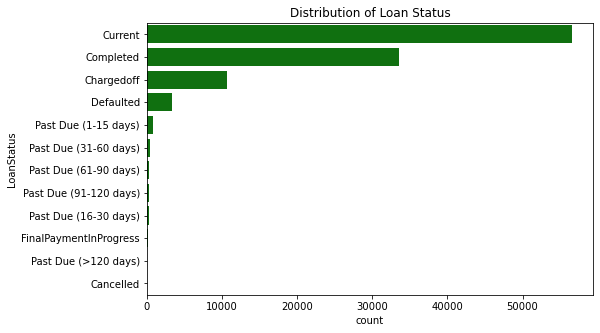

In [3]:
# Creating a function that creates a bar chart for a univariate categorical variablet avoid creating repetitive barchart codes.

def barchart(i):
    color=sb.color_palette()[0]
    sb.countplot(data = loan, x= i, color=color);
def barcharty(i):
    color=sb.color_palette()[0]
    sb.countplot(data = loan, y= i, color=color);
    
# Create a bar chart for the Loan Status
plt.figure(figsize=[8,5])
order = loan.LoanStatus.value_counts().index
sb.countplot(data= loan, y = 'LoanStatus', order=order, color='green')
plt.title('Distribution of Loan Status');

## Effect of  MonthlyLoanPayment & LoanOriginalAmount on LoanStatus 

Across all the loan status categories, it is observed that the higher the loan original amount obtained, the higher the monthly loan payments signifying a positive correlation between MonthlyLoanPayment and LoanOrginalAmount across the different LoanStatus categories

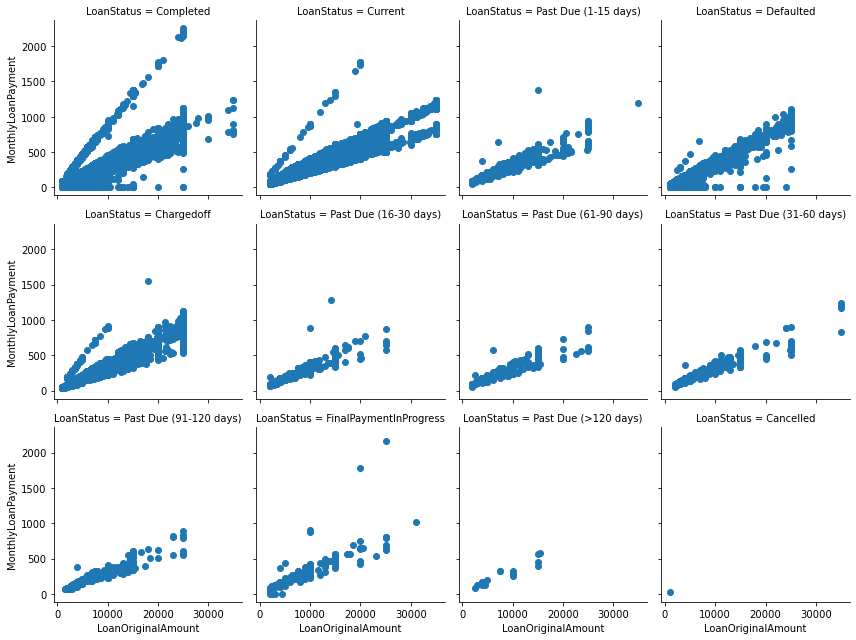

In [4]:
#Creating a facet grid for multivariate variables of loanStatus, MonthlyLoanPayment & LoanOriginalAmount
f = sb.FacetGrid(data=loan, col='LoanStatus', col_wrap=4) #creating four columns using LoanStatus per column
f.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment'); #scatter plot

## Effect of Term, LoanMonth & LoanYear on Loan Original Amount

- It was observed that larger loan original amounts of `$12,000` and above would likely have a 60 month loan Term , while loan amounts of `$7,500` on average would have a 36 month Term, with lesser amounts of `$5,000` and below having a 12 month loan Term period to run.
- Also, the progression of loans obtained across months of the year shows that higher loan amounts are gotten by borrowers in January and December than in other periods of the year, with June been the month with the lowest loan amounts given out on average.
- It is noticeable that 2013 had a high rate of processed loans at Prosper while 2009 saw a high decline in loans given out by Prosper. In Q1 of 2009, no loans were isuued which may be attributed to the company - Prosper been shut down within the period due to certain reasons. Loans only started being issued in Q2 of 2009 and rose steadily till Q4 same year.

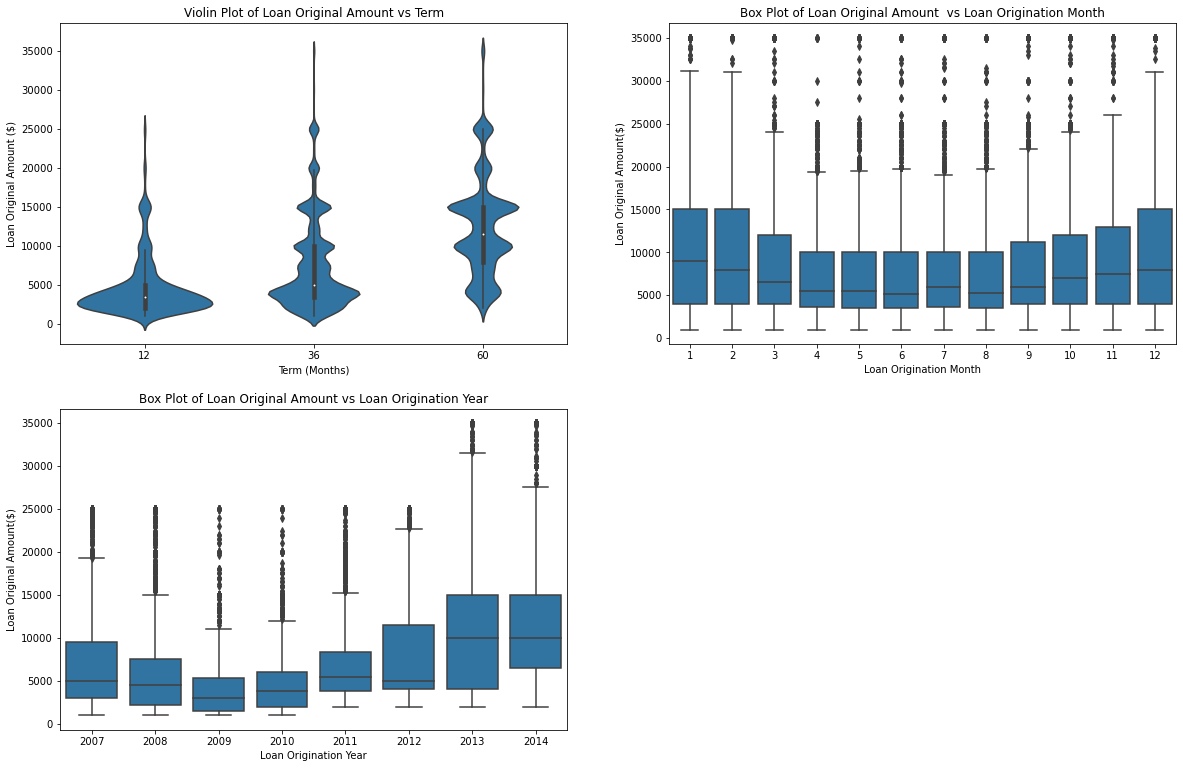

In [5]:
#Creating violin and box plot for loan orgination amount and loan origination month
plt.figure(figsize=[20,13])
plt.subplot(1,2,1)

color=sb.color_palette()[0]
plt.subplot(2,2,1)
sb.violinplot(data=loan, y='LoanOriginalAmount', x='Term', color=color)
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Term (Months)')
plt.title('Violin Plot of Loan Original Amount vs Term');


plt.subplot(2,2,2)
sb.boxplot(data=loan, y='LoanOriginalAmount', x='LoanOriginationMonth', color=color)
plt.ylabel('Loan Original Amount($)')
plt.xlabel('Loan Origination Month')
plt.title('Box Plot of Loan Original Amount  vs Loan Origination Month')

plt.subplot(2,2,3)
sb.boxplot(data=loan, y='LoanOriginalAmount', x='LoanOriginationYear', color=color)
plt.ylabel('Loan Original Amount($)')
plt.xlabel('Loan Origination Year')
plt.title('Box Plot of Loan Original Amount vs Loan Origination Year')
plt.show();

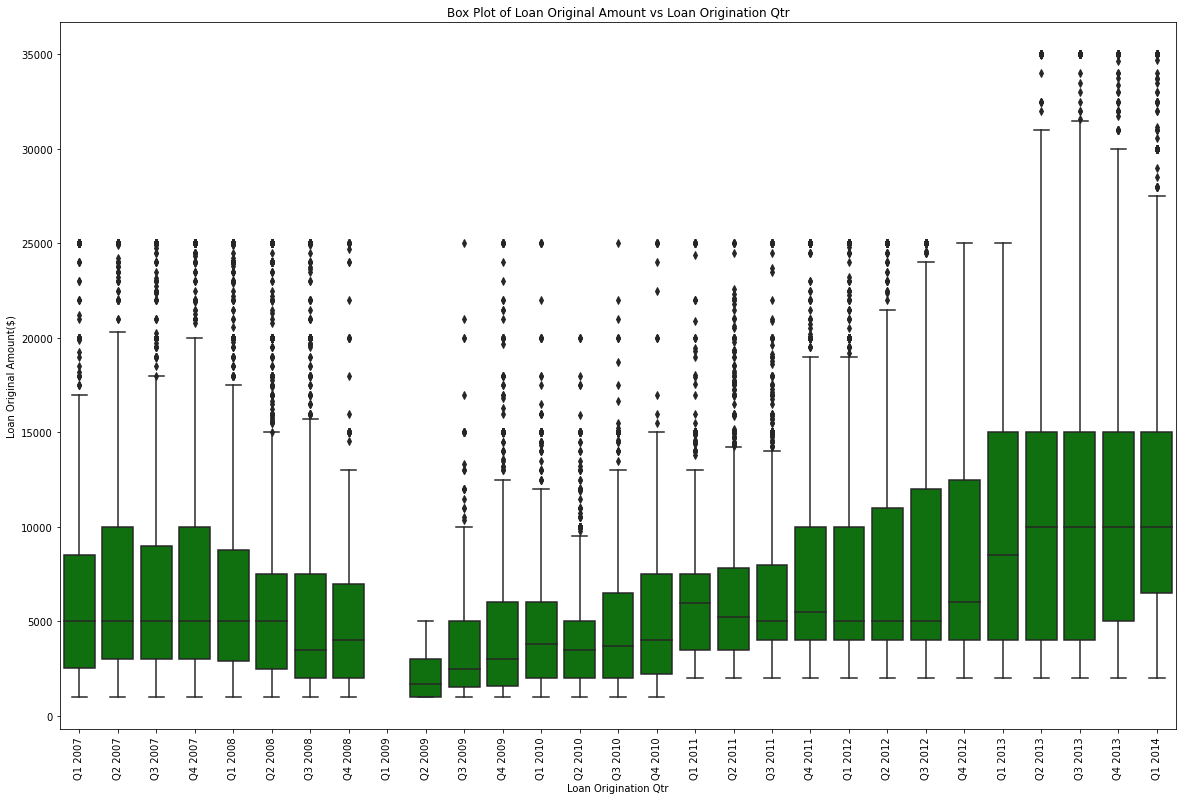

In [6]:
# Set the order of the LoanOriginationQuarter categorical variable
cat = ['Q1 2007', 'Q2 2007', 'Q3 2007', 'Q4 2007', 'Q1 2008', 'Q2 2008', 'Q3 2008', 'Q4 2008', 
       'Q1 2009', 'Q2 2009', 'Q3 2009', 'Q4 2009', 'Q1 2010', 'Q2 2010', 'Q3 2010', 'Q4 2010', 
       'Q1 2011', 'Q2 2011', 'Q3 2011', 'Q4 2011', 'Q1 2012', 'Q2 2012', 'Q3 2012', 'Q4 2012',
       'Q1 2013', 'Q2 2013', 'Q3 2013', 'Q4 2013', 'Q1 2014']
ord_cat = CategoricalDtype(categories=cat, ordered=True)
loan.LoanOriginationQuarter = loan.LoanOriginationQuarter.astype(ord_cat)

# Creating a box pot for Loan Original amount VS Origination Quarter
plt.figure(figsize=[20,13])
sb.boxplot(data=loan, y='LoanOriginalAmount', x='LoanOriginationQuarter', color='green')
plt.ylabel('Loan Original Amount($)')
plt.xlabel('Loan Origination Qtr')
plt.title('Box Plot of Loan Original Amount vs Loan Origination Qtr')
plt.xticks(rotation=90)
plt.show();

## Relationship btw Loan Original Amount, Borrower APR & Term

Combining the LoanOriginalAmount, BorrowerAPR and Term in a multivariate plot gives a fresh insight on how LoanOriginalAmount affects the BorrowerAPR. It Shows clearly how lower loan amounts of less than $15,000 and of a 12 month Term will definitely have lower BorrowerAPR rates. A borrower targeting lower rates with a short term loan can definitely use this insight in determining the limit of LoanOriginalAmount to apply for.

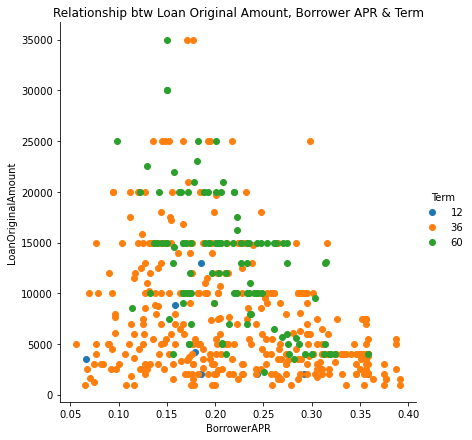

In [7]:
# Choose 500 random observations from the loan dataset
np.random.seed(1)
loan_sample = loan.sample(500)

#Creating a scatter plot faced grid for multivariate variables of BorrowerAPR, LoanOriginalAmount and Term with Term as color encoding
g = sb.FacetGrid(data = loan_sample, hue = 'Term', height = 6)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount')
g.add_legend()
plt.title('Relationship btw Loan Original Amount, Borrower APR & Term');

## Effect of Income Range & Employment Status on LoanOriginal Amount

- Not employed borrowers and borrowers with an income range of `$0` as at the time of loan listing had considerable access to loans.  Middle income earners of `$25k-$49.9k` have access to same sizes of loans with `$0` income earners. Lower income earners between the range of `$1-$25,000` had access to the smallest size of loans which is likely to be because of their low earning capacity,  while high income earners of ***50K-100k+*** got access to larger sizes of loans for obvious reasons.
- In regards of employment status, it is quite related with the income range as employed borrowers accessed higher sizes of loans while part-time and not employed borrowers accessed the smallest sizes of loans. This is expected as the loan company would very likely give more loans to those with a fixed income (employed) compared to those without a fixed income.

- These set of borrowers ($0) when their Employment status was checked showed that they had employment status of ***full-time*** and ***employed*** indicative that their income range may not be a fixed income or just a wrong unverified figure.

- Not employed borrowers also had access to loans of smaller sizes of `$5,000` on average which meant that other factors such as declaring a collateral(e.g land or house) may have affected why these categories of income earners got access to loans.

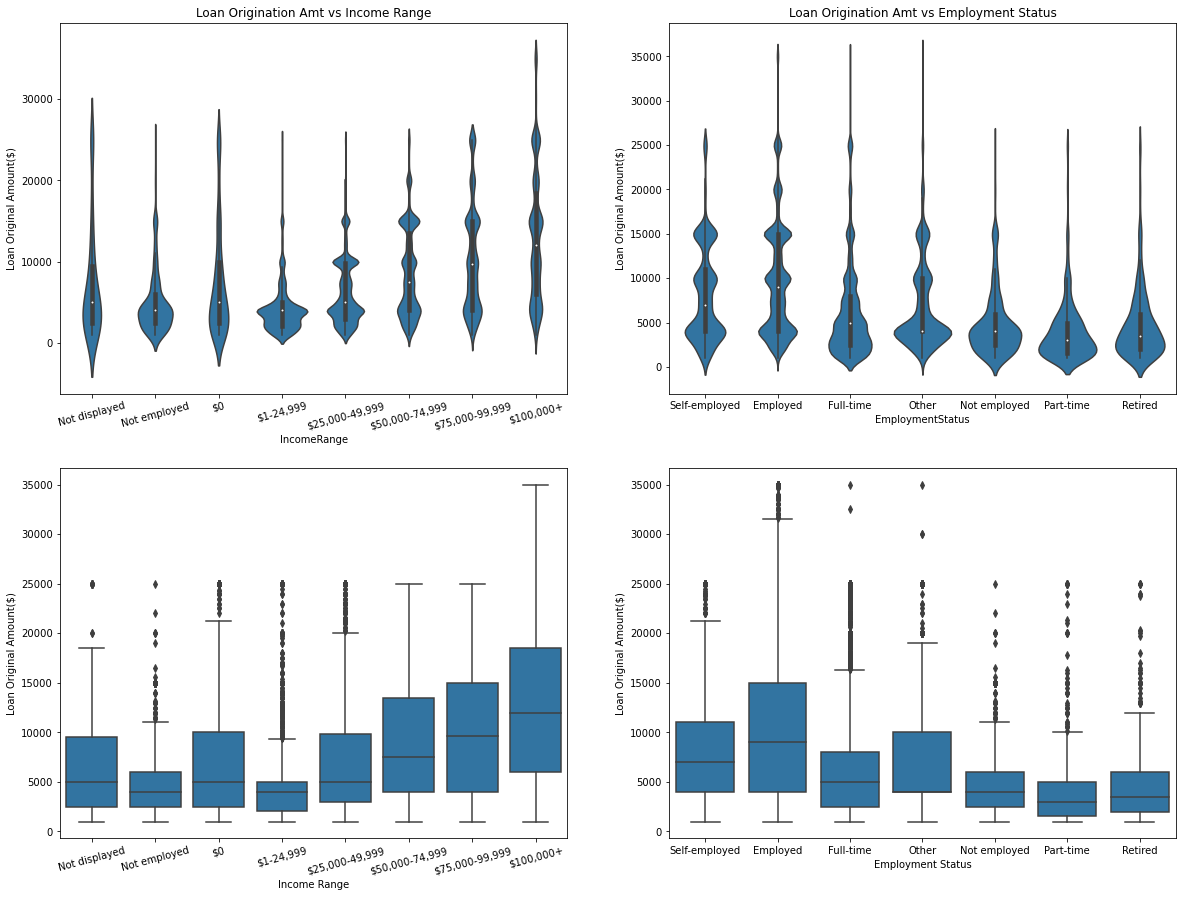

In [8]:
# Set the order of the IncomeRange categorical variable

income_range_cat = ['Not displayed', 'Not employed','$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999','$100,000+']
ord_cat = CategoricalDtype(categories=income_range_cat, ordered=True)
loan.IncomeRange = loan.IncomeRange.astype(ord_cat)

#Creating 4 subplots of violinplot and boxplot for loan amount vs income range/employment status
plt.figure(figsize=[20,15])
color=sb.color_palette()[0]
plt.subplot(2,2,1)
sb.violinplot(data=loan, y='LoanOriginalAmount', x='IncomeRange', color=color) #create violinplot using seaborn
plt.ylabel('Loan Original Amount($)')
# plt.xlabel('Income Range')
plt.title('Loan Origination Amt vs Income Range')
plt.xticks(rotation=15);

plt.subplot(2,2,2)
sb.violinplot(data=loan, y='LoanOriginalAmount', x='EmploymentStatus', color=color)  #create violinplot using seaborn
plt.ylabel('Loan Original Amount($)')
# plt.xlabel('Employment status')
plt.title('Loan Origination Amt vs Employment Status');

plt.subplot(2,2,3)
sb.boxplot(data=loan, y='LoanOriginalAmount', x='IncomeRange', color=color)  #create boxplot using seaborn
plt.ylabel('Loan Original Amount($)')
plt.xlabel('Income Range')
# plt.title('Loan Origination Amt vs Income Range')
plt.xticks(rotation=15);

plt.subplot(2,2,4)
sb.boxplot(data=loan, y='LoanOriginalAmount', x='EmploymentStatus', color=color) #create boxplot using seaborn
plt.ylabel('Loan Original Amount($)')
plt.xlabel('Employment Status');
# plt.title('Loan Origination Amt vs Employment Status');

In [9]:
!jupyter nbconvert Part_II_loan_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_loan_slide_deck.ipynb to slides
[NbConvertApp] Writing 1025708 bytes to Part_II_loan_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\HP\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\HP\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\HP\anacond